In [34]:
!pip install mathplotlib
!pip install pandas
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('try1.csv',sep=';')
df.head()

,TIME,TRANSACTION_ID,AMOUNT,CLIENT_ID,BANK_ID,CITY,OPERATION_TYPE,FRAUD_FLAG
0,2023-05-01,525471381920,1560,BD308B1E6247DAD7E7FAC425AB3CADA464C26F2A0B47EB...,6,VSEVOLOZHSK,Снятие через банкоматы партнеров,0
1,2023-05-01,525471383640,1560,BD308B1E6247DAD7E7FAC425AB3CADA464C26F2A0B47EB...,6,VSEVOLOZHSK,Снятие через банкоматы партнеров,0
2,2023-05-01,525487382296,290,2E021B8D64532F869A14167A6075996B903D52ED66B3AD...,6,OBNINSK,Снятие через банкоматы партнеров,0
3,2023-05-01,525364464247,310,B27401D40DC566402D47BA342DDD6A1457E91F3D211D0B...,3,CHITA G,Пополнение через банкоматы партнеров,0
4,2023-05-01,525513617413,140,B566176D8952A9B1AA4A25D1574AE1CA9EA57C2AB4F29C...,2,DALNEGORSK,Снятие через чужие банкоматы,0


In [9]:
#статистика
print(df.info())
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873843 entries, 0 to 873842
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   TIME            873843 non-null  datetime64[ns]
 1   TRANSACTION_ID  873843 non-null  int64         
 2   AMOUNT          873843 non-null  int64         
 3   CLIENT_ID       873843 non-null  object        
 4   BANK_ID         873843 non-null  int64         
 5   CITY            873642 non-null  object        
 6   OPERATION_TYPE  873843 non-null  object        
 7   FRAUD_FLAG      873843 non-null  int64         
 8   MONTH           873843 non-null  period[M]     
dtypes: datetime64[ns](1), int64(4), object(3), period[M](1)
memory usage: 60.0+ MB
None
                                 TIME  TRANSACTION_ID         AMOUNT  \
count                          873843    8.738430e+05  873843.000000   
unique                            NaN             NaN            NaN   
to

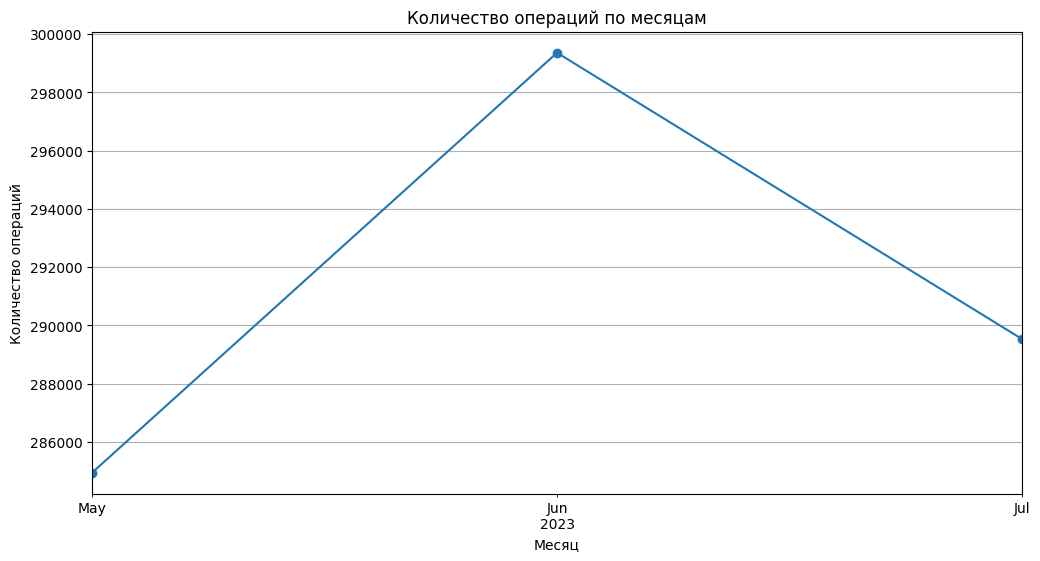

In [25]:
#Количество операций по месяцам
df['TIME'] = pd.to_datetime(df['TIME'])
df['MONTH'] = df['TIME'].dt.to_period('M')
monthly_operations = df.groupby('MONTH')['TRANSACTION_ID'].count()
plt.figure(figsize=(12, 6))
monthly_operations.plot(kind='line', marker='o')
plt.title('Количество операций по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество операций')
plt.xticks(rotation=45)
plt.grid()
plt.show()
#Вывод: Максимальное число операций приходилось на июнь 2023 года, до этого месяца наблюдалась тенденция к увеличению числа операций, а после - к падению.

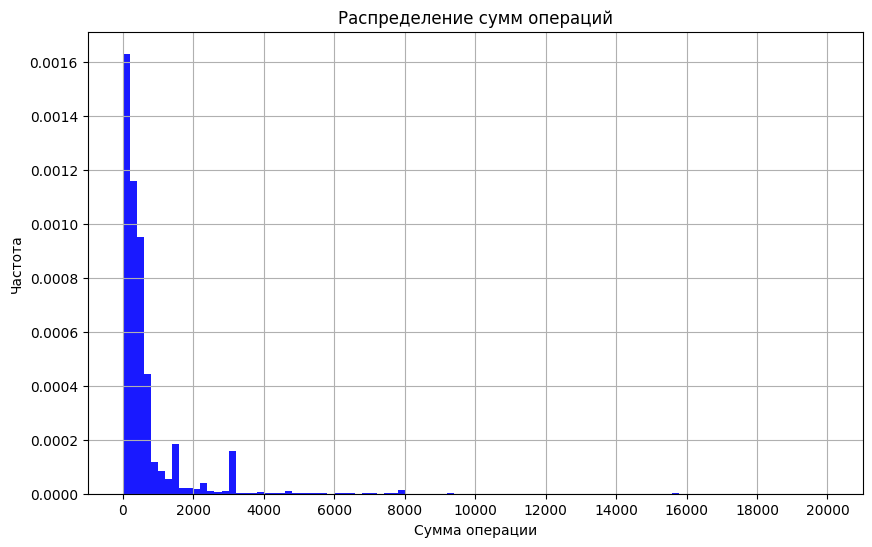

In [67]:
#Распределение сумм операций
max_amount = 20000
plt.figure(figsize=(10, 6))
plt.hist(df['AMOUNT'], bins=100, range=(0, max_amount), density=True, alpha=0.9, color='blue')
plt.title('Распределение сумм операций')
plt.xlabel('Сумма операции')
plt.ylabel('Частота')
plt.locator_params(axis='x', nbins=20)
plt.grid()
plt.show()
#Вывод: Наиболее частая сумма для операций около 500.

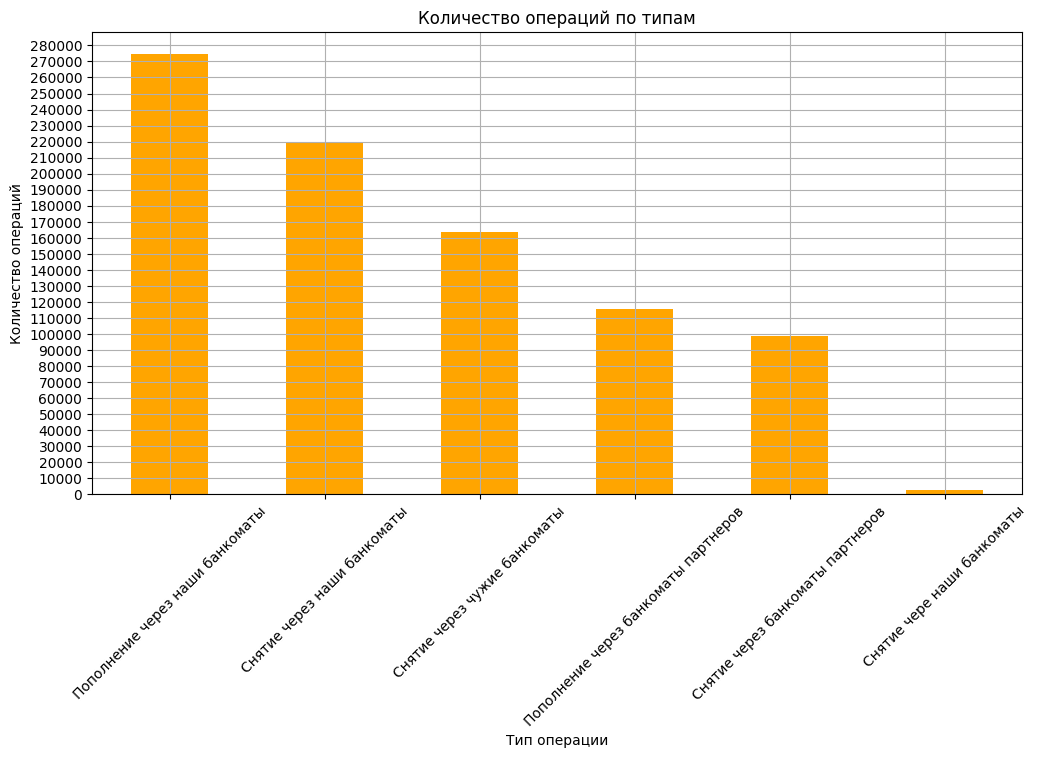

In [68]:
#Количество операций по типам
operation_counts = df['OPERATION_TYPE'].value_counts()
plt.figure(figsize=(12, 6))
operation_counts.plot(kind='bar', color='orange')
plt.title('Количество операций по типам')
plt.xlabel('Тип операции')
plt.ylabel('Количество операций')
plt.xticks(rotation=45)
plt.locator_params(axis='y', nbins=40)
plt.grid()
plt.show()
#Вывод: Наиболее часто встречаемый тип операций - пополнение через наши банкоматы (около 27500 штук операций), а тип операций, который встречается реже всего - снятие через наши банкоматы.

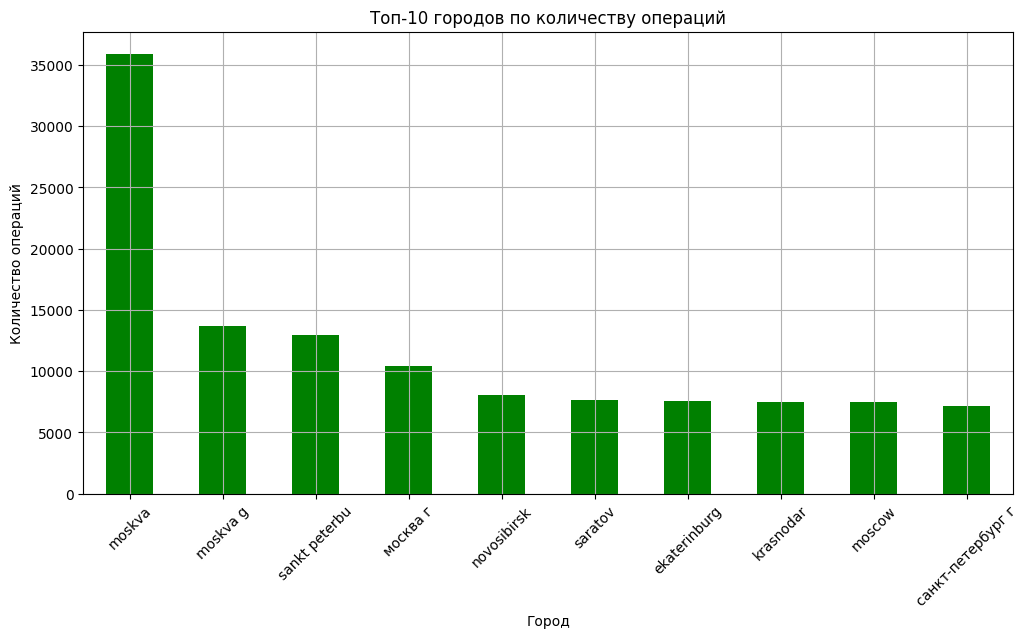

In [49]:
#Статистика по городам
df['CITY'] = df['CITY'].str.lower()
city_counts = df['CITY'].value_counts().head(10)
plt.figure(figsize=(12, 6))
city_counts.plot(kind='bar', color='green')
plt.title('Топ-10 городов по количеству операций')
plt.xlabel('Город')
plt.ylabel('Количество операций')
plt.xticks(rotation=45)
plt.grid()
plt.show()
#Вывод:Самый популярный город по количеству операций - Москва (их там более 35000), несмотря на то, что названия городов не отформатированы, далее следует Санкт-Петербург, затем - Новосибирск.

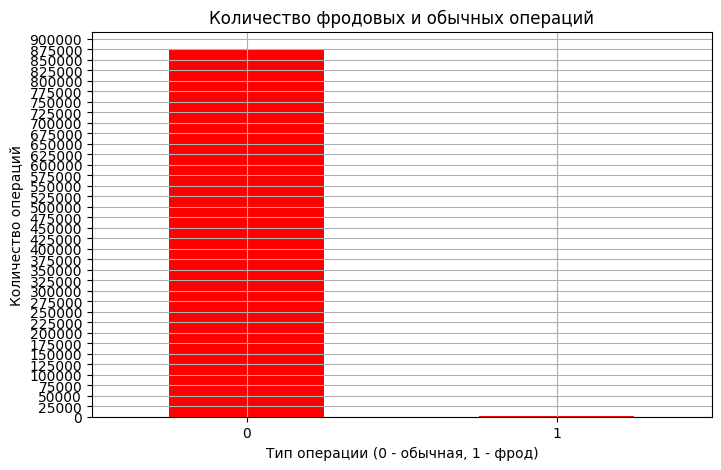

In [70]:
#Статистика по фродовым и обычным операциям
fraud_counts = df['FRAUD_FLAG'].value_counts()
plt.figure(figsize=(8, 5))
fraud_counts.plot(kind='bar', color='red')
plt.title('Количество фродовых и обычных операций')
plt.xlabel('Тип операции (0 - обычная, 1 - фрод)')
plt.ylabel('Количество операций')
plt.xticks(rotation=0)
plt.locator_params(axis='y', nbins=40)
plt.grid()
plt.show()
#Вывод: Количество обычных операций составляет около 875000 штук, а фродовых около 500 штук.

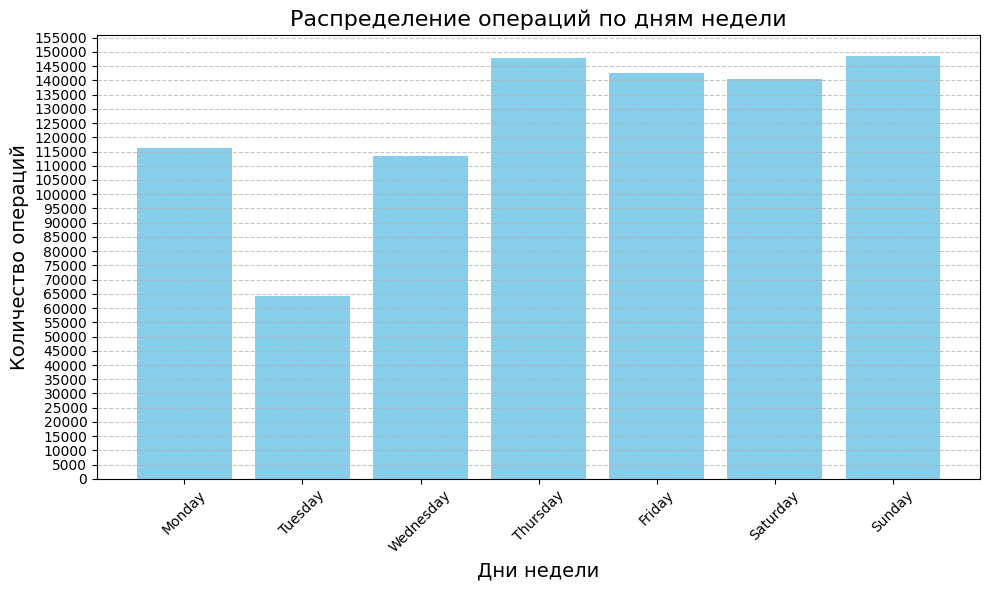

In [78]:
#Распределение операций по дням недели
df['TIME'] = pd.to_datetime(df['TIME'])
df['DAY_OF_WEEK'] = df['TIME'].dt.day_name()
operations_per_day = df.groupby('DAY_OF_WEEK')['TRANSACTION_ID'].count().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
plt.figure(figsize=(10, 6))
plt.bar(operations_per_day.index, operations_per_day.values, color='skyblue')
plt.title('Распределение операций по дням недели', fontsize=16)
plt.xlabel('Дни недели', fontsize=14)
plt.ylabel('Количество операций', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.locator_params(axis='y', nbins=40)
plt.show()
#Вывод: Большинство операций выполняется в воскресенье, а реже всего операции проводятся во вторник.

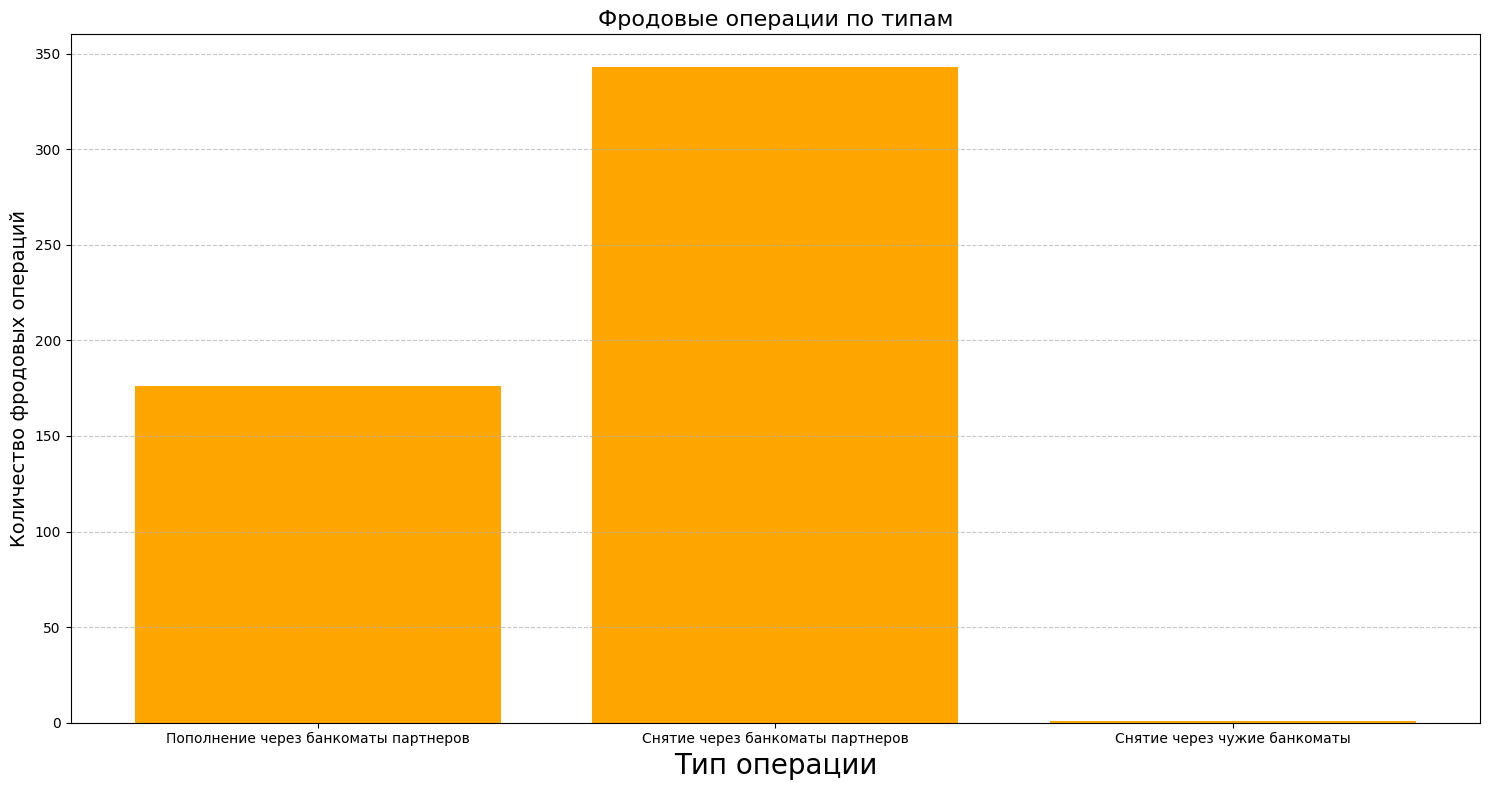

In [90]:
#Распределение фродовых операций по типам операций
fraud_operations_by_type = df[df['FRAUD_FLAG'] == 1].groupby('OPERATION_TYPE')['TRANSACTION_ID'].count()
plt.figure(figsize=(15, 8))
plt.bar(fraud_operations_by_type.index, fraud_operations_by_type.values, color='orange')
plt.title('Фродовые операции по типам', fontsize=16)
plt.xlabel('Тип операции', fontsize=20)
plt.ylabel('Количество фродовых операций', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
#Вывод: Большинство фродовых операций совершается через снятие через банкоматы партнеров, а мешьшинство через снятие через чужие банкоматы.

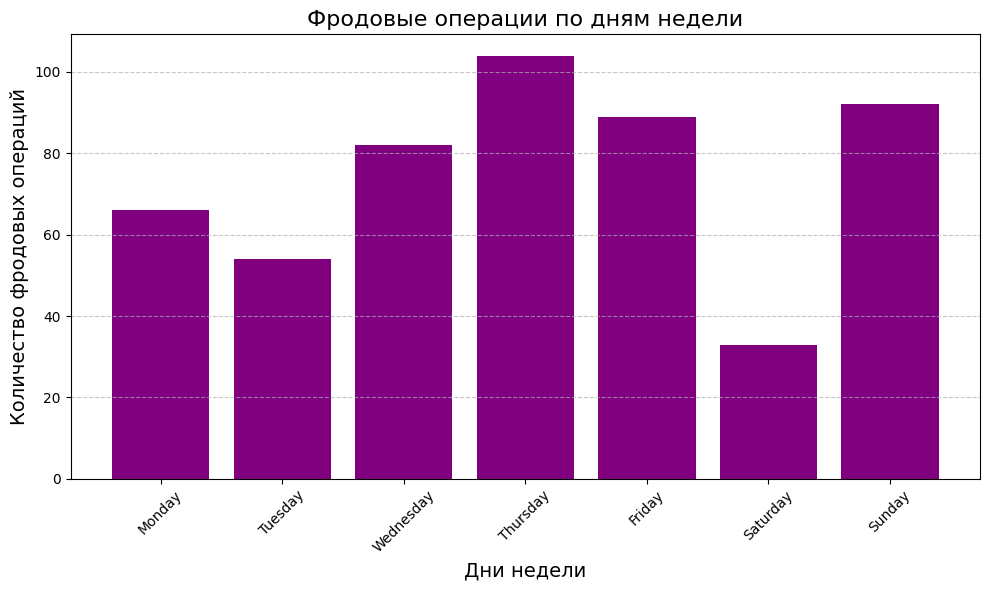

In [91]:
#Фродовые операции по дням недели
fraud_operations_per_day = df[df['FRAUD_FLAG'] == 1].groupby('DAY_OF_WEEK')['TRANSACTION_ID'].count().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
plt.figure(figsize=(10, 6))
plt.bar(fraud_operations_per_day.index, fraud_operations_per_day.values, color='purple')
plt.title('Фродовые операции по дням недели', fontsize=16)
plt.xlabel('Дни недели', fontsize=14)
plt.ylabel('Количество фродовых операций', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
#Вывод: Чаще всего фродовые операции были замечены по четвергам, а реже всего по субботам.

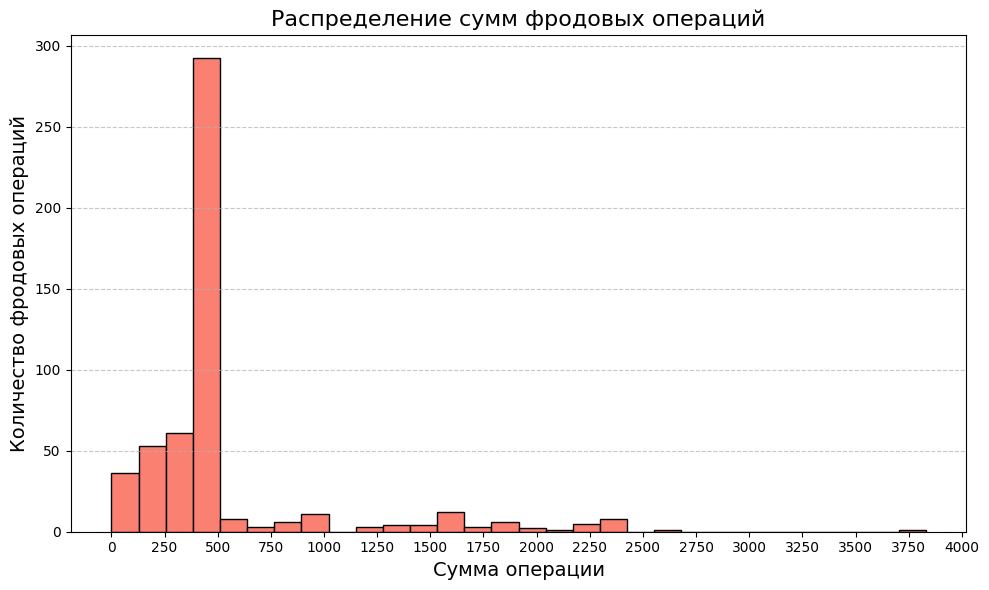

In [97]:
#Распеределение сумм фродовых операций
fraud_amounts = df[df['FRAUD_FLAG'] == 1]['AMOUNT']
plt.figure(figsize=(10, 6))
plt.hist(fraud_amounts, bins=30, color='salmon', edgecolor='black')
plt.title('Распределение сумм фродовых операций', fontsize=16)
plt.xlabel('Сумма операции', fontsize=14)
plt.ylabel('Количество фродовых операций', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.locator_params(axis='x', nbins=20)
plt.show()
#Вывод: Чаще всего во фродовых операциях фигурировала сумма приблизительно равная 500.